,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   gender                   1000 non-null   int32
 1   lunch                    1000 non-null   int32
 2   test preparation course  1000 non-null   int32
 3   math score               1000 non-null   int64
 4   reading score            1000 non-null   int64
 5   writing score            1000 non-null   int64
 6   associate's degree       1000 non-null   int32
 7   bachelor's degree        1000 non-null   int32
 8   high school              1000 non-null   int32
 9   master's degree          1000 non-null   int32
 10  some college             1000 non-null   int32
 11  some high school         1000 non-null   int32
 12  group A                  1000 non-null   int32
 13  group B                  1000 non-null   int32
 14  group C                  1000 non-null   int32
 15  group

,gender,lunch,test preparation course,math score,reading score,writing score,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,group A,group B,group C,group D,group E
0,0,0,0,72,72,74,0,1,0,0,0,0,0,1,0,0,0
1,0,0,1,69,90,88,0,0,0,0,1,0,0,0,1,0,0
2,0,0,0,90,95,93,0,0,0,1,0,0,0,1,0,0,0
3,1,1,0,47,57,44,1,0,0,0,0,0,1,0,0,0,0
4,1,0,0,76,78,75,0,0,0,0,1,0,0,0,1,0,0


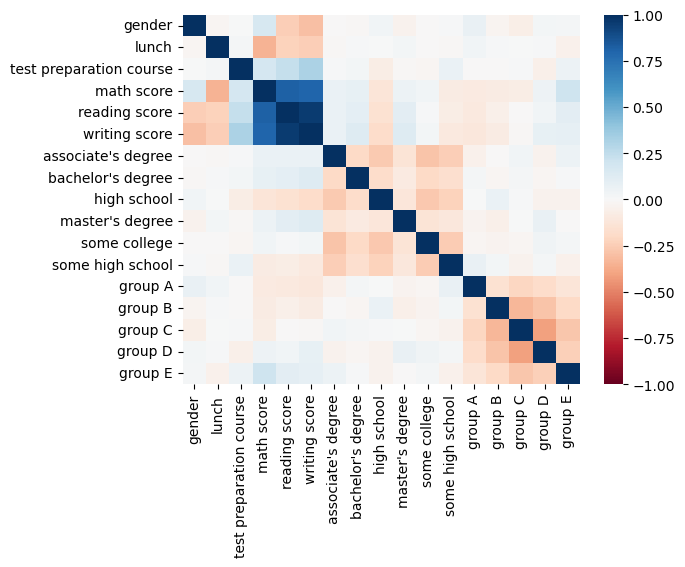

In [69]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

dataset = pd.read_csv("StudentsPerformance.csv")
display(dataset.head(5))
le = preprocessing.LabelEncoder()
le.fit(dataset['gender'])
dataset['gender'] = le.transform(dataset['gender'])
le.fit(dataset['lunch'])
dataset['lunch'] = 1- le.transform(dataset['lunch'])
le.fit(dataset['test preparation course'])
dataset['test preparation course'] = 1 - le.transform(dataset['test preparation course'])

parental_education = pd.get_dummies(dataset['parental level of education'], dtype=int)
race_ethnicity = pd.get_dummies(dataset['race/ethnicity'], dtype=int)

dataset = dataset.drop(["race/ethnicity", "parental level of education"], axis=1)
dataset = pd.concat([dataset, parental_education, race_ethnicity], axis="columns")
# dataset.to_csv("StudentsPerformance_OH.csv", index=False)

sns.heatmap(dataset.corr(), vmin=-1, vmax=1, center=0, annot=False, cmap="RdBu")
dataset.info()
dataset.head()

In [70]:
from sklearn.model_selection import train_test_split
X = dataset.drop(["math score", "reading score", "writing score"], axis=1)
y = pd.concat([dataset["math score"], dataset["reading score"], dataset["writing score"]], axis="columns")
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
# print(x_train)
# print(y_train)
# print(x_test)
# print(y_test)

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
rfr = RandomForestRegressor(random_state=0)
# rfr = RandomForestRegressor(max_depth=3, random_state=0) # 10.24 / 163.61
# rfr = RandomForestRegressor(max_depth=3, random_state=0, criterion="absolute_error") # 10.22 / 162.44

rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
print(mae)
print(mse)


11.463168906876502
205.58706528218866


In [72]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=5, max_iter=500, solver='sgd')
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)

print(mae)
print(mse)

9.929619593538202
149.76416672563414


MAE: 9.853658574354878
MSE: 147.64291029628728


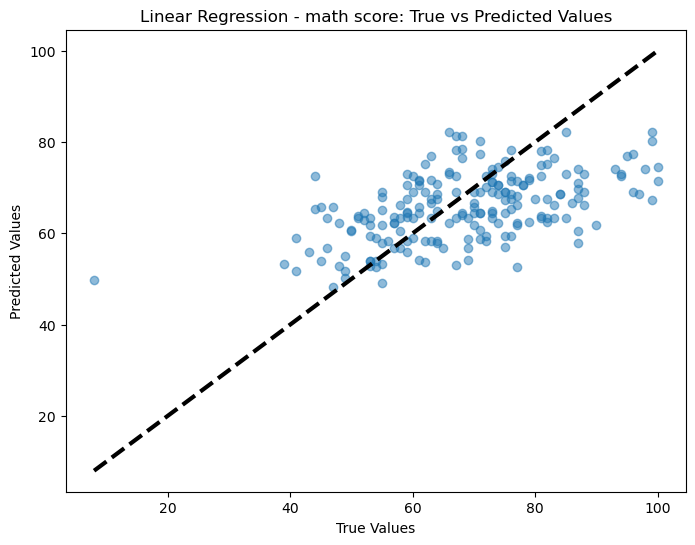

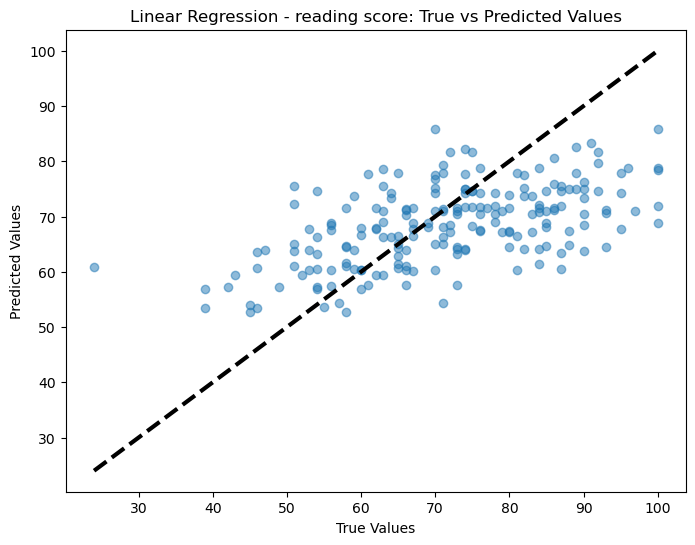

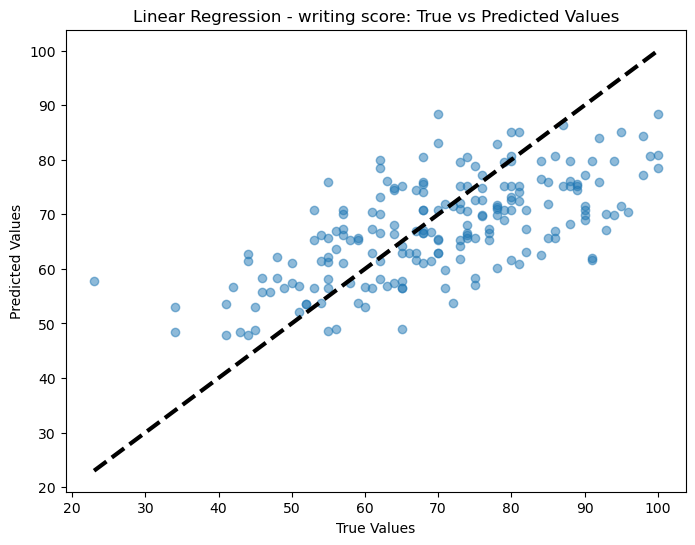

In [78]:
from sklearn.linear_model import LinearRegression
import pickle
# X = dataset.drop(["math score", "reading score", "writing score"], axis=1)
# #Y = pd.concat([dataset["math score"], dataset["reading score"], dataset["writing score"]], axis="columns")
# Y = pd.concat([dataset["math score"]], axis="columns")
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
# print(x_train)
# print(y_train)
# print(x_test)
# print(y_test)

lr = LinearRegression(fit_intercept=False)

lr.fit(x_train, y_train)
# past the training data to the Linear Regression

predicted = lr.predict(x_test)
print("MAE:", mean_absolute_error(predicted, y_test))
print("MSE:",mean_squared_error(predicted, y_test))
# compare the predicted data with the given testing data

# print(mean_absolute_error(y_train, lr.predict(x_train)))
data = {"coefficients":lr.coef_, "intercept":lr.intercept_}
# with open('model.pkl', 'wb') as file:
#     pickle.dump(data, file)
# print(lr.coef_, lr.intercept_)
# print(sum(lr.coef_[0] * [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]) + lr.intercept_[0])
# print(y_train)
# print(lr.predict(pd.array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]).reshape(1, -1)))
lr.fit(x_train, y_train)
predicted_lr = lr.predict(x_test)

# Scatter plot for Linear Regression
for i, target in enumerate(['math score', 'reading score', 'writing score']):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test[target], predicted_lr[:, i], alpha=0.5)
    plt.plot([min(y_test[target]), max(y_test[target])], [min(y_test[target]), max(y_test[target])], 'k--', lw=3)
    plt.title(f'Linear Regression - {target}: True vs Predicted Values')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.show()

In [74]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

def rfr(X_train, X_test, y_train, y_test):
    param_grid = {
        'n_estimators': [10, 50, 100, 200],
        'max_depth': [1, 2, 3, 4,5],
        'criterion': ["squared_error", "absolute_error", "friedman_mse", "poisson"]
    }

    # Create the Random Forest Regressor
    rf = RFR(random_state=42)

    # Create a GridSearchCV instance
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

    # Fit the model to find the best hyperparameters
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_rf = grid_search.best_estimator_
    
    y_pred = best_rf.predict(X_test)
    rfr_mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    gs_results = pd.DataFrame.from_dict(grid_search.cv_results_)
    
    return  best_rf,rfr_mae,mse,r2_score(y_test, y_pred), gs_results
    

rfr_model, rfr_mae,rfr_mse,rfr_r2, gs_results = rfr(x_train, x_test, y_train, y_test)

print(rfr_mae,rfr_mse,rfr_r2)


10.20343831776875 160.58393281088738 0.24361642746010803


,param_criterion,param_max_depth,param_n_estimators,params,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,squared_error,1,10,"{'criterion': 'squared_error', 'max_depth': 1,...",-11.049264,-11.484992,0.419963,75
1,squared_error,1,50,"{'criterion': 'squared_error', 'max_depth': 1,...",-11.003761,-11.446321,0.463599,69
2,squared_error,1,100,"{'criterion': 'squared_error', 'max_depth': 1,...",-11.007694,-11.448713,0.459146,70
3,squared_error,1,200,"{'criterion': 'squared_error', 'max_depth': 1,...",-10.997026,-11.458143,0.466992,71
4,squared_error,2,10,"{'criterion': 'squared_error', 'max_depth': 2,...",-10.714833,-11.112209,0.342512,48
5,squared_error,2,50,"{'criterion': 'squared_error', 'max_depth': 2,...",-10.669264,-11.111933,0.362657,47
6,squared_error,2,100,"{'criterion': 'squared_error', 'max_depth': 2,...",-10.674659,-11.113368,0.352370,49
7,squared_error,2,200,"{'criterion': 'squared_error', 'max_depth': 2,...",-10.674320,-11.115772,0.361476,51
8,squared_error,3,10,"{'criterion': 'squared_error', 'max_depth': 3,...",-10.659647,-11.026437,0.221900,37
9,squared_error,3,50,"{'criterion': 'squared_error', 'max_depth': 3,...",-10.522229,-10.970616,0.268017,23


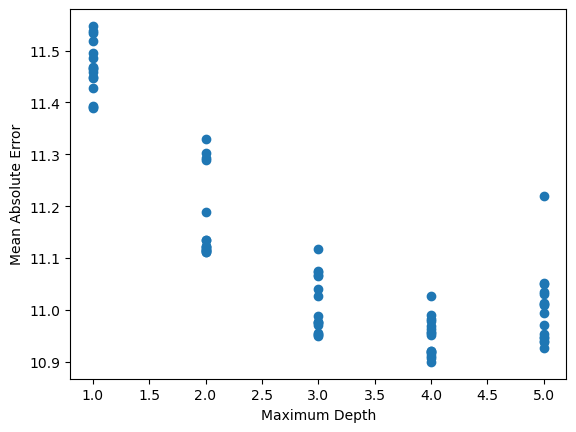

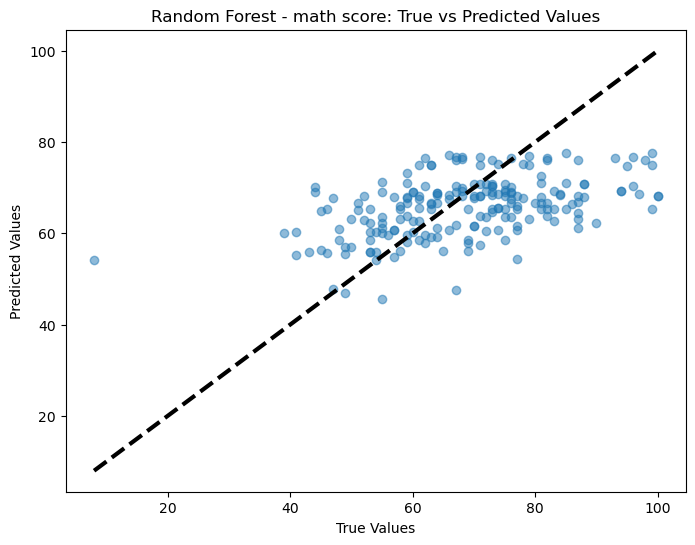

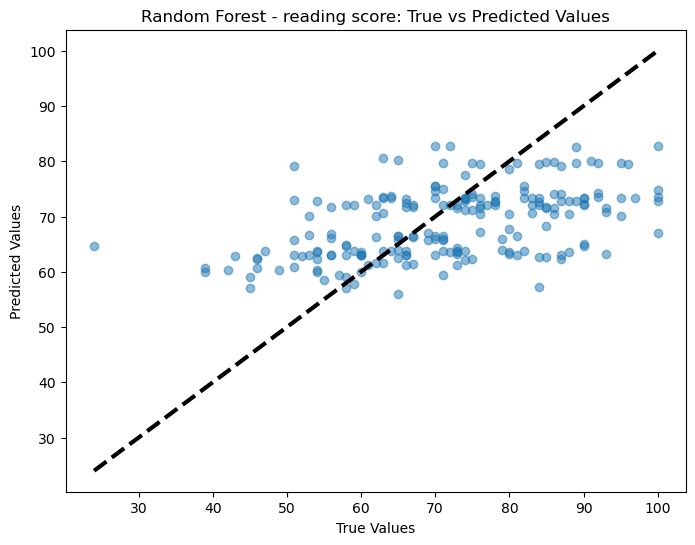

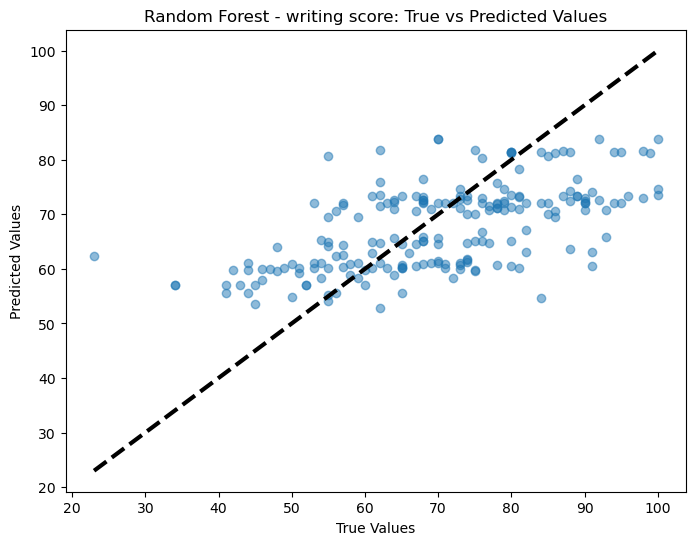

In [75]:
from math import log
with pd.option_context('display.max_rows', 80):display(gs_results.drop(["mean_fit_time", "std_fit_time", "mean_score_time", "std_score_time", "split0_test_score", "split1_test_score", "split2_test_score", "split3_test_score"], axis=1))
plt.scatter(gs_results["param_max_depth"], gs_results["mean_test_score"]*-1)
plt.xlabel("Maximum Depth")
plt.ylabel("Mean Absolute Error")
plt.show()
# rf_model is the trained random forest model
rfr_model.fit(x_train, y_train)
predicted_rf = rfr_model.predict(x_test)

# Scatter plot for Random Forest
for i, target in enumerate(['math score', 'reading score', 'writing score']):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test[target], predicted_rf[:, i], alpha=0.5)
    plt.plot([min(y_test[target]), max(y_test[target])], [min(y_test[target]), max(y_test[target])], 'k--', lw=3)
    plt.title(f'Random Forest - {target}: True vs Predicted Values')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.show()


In [76]:
param_grid = {
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ["lbfgs", "sgd", "adam"],
    # 'alpha': [0.0001, 0.1, 1, 100, 10000],
    'learning_rate':["constant", "invscaling", "adaptive"]
}

# Create the Random Forest Regressor
rf = MLPRegressor(random_state=1)

# Create a GridSearchCV instance
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit the model to find the best hyperparameters
grid_search.fit(x_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(x_test)
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
gs_results = pd.DataFrame.from_dict(grid_search.cv_results_)
with pd.option_context('display.max_rows', 80):display(gs_results.drop(["mean_fit_time", "std_fit_time", "mean_score_time", "std_score_time", "split0_test_score", "split1_test_score", "split2_test_score", "split3_test_score"], axis=1))

9.853519455434473
147.64010171397464


,param_activation,param_learning_rate,param_solver,params,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,identity,constant,lbfgs,"{'activation': 'identity', 'learning_rate': 'c...",-10.106981,-10.654555,0.348694,1
1,identity,constant,sgd,"{'activation': 'identity', 'learning_rate': 'c...",-10.175514,-10.677621,0.361706,6
2,identity,constant,adam,"{'activation': 'identity', 'learning_rate': 'c...",-12.285265,-12.337128,0.306395,25
3,identity,invscaling,lbfgs,"{'activation': 'identity', 'learning_rate': 'i...",-10.106981,-10.654555,0.348694,1
4,identity,invscaling,sgd,"{'activation': 'identity', 'learning_rate': 'i...",-12.073343,-12.345552,0.290759,28
5,identity,invscaling,adam,"{'activation': 'identity', 'learning_rate': 'i...",-12.285265,-12.337128,0.306395,25
6,identity,adaptive,lbfgs,"{'activation': 'identity', 'learning_rate': 'a...",-10.106981,-10.654555,0.348694,1
7,identity,adaptive,sgd,"{'activation': 'identity', 'learning_rate': 'a...",-10.110110,-10.655421,0.351675,4
8,identity,adaptive,adam,"{'activation': 'identity', 'learning_rate': 'a...",-12.285265,-12.337128,0.306395,25
9,logistic,constant,lbfgs,"{'activation': 'logistic', 'learning_rate': 'c...",-11.547116,-12.281257,0.738272,21


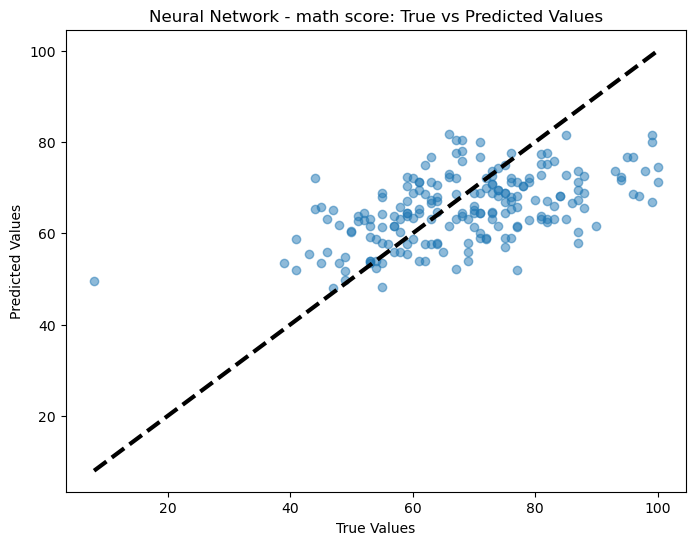

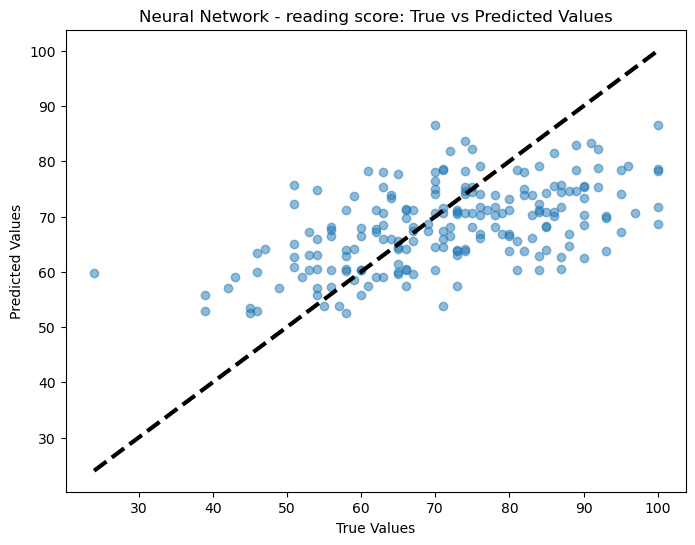

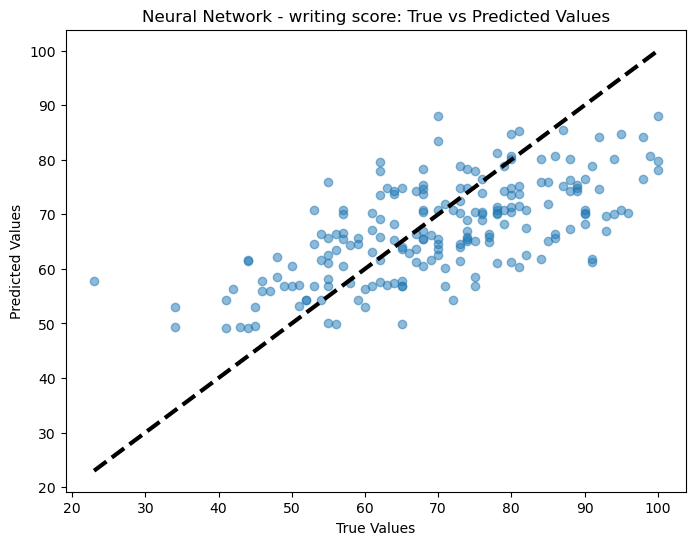

In [77]:
# best_rf is the trained neural network model
best_rf.fit(x_train, y_train)
predicted_nn = mlp.predict(x_test)

# Scatter plot for Neural Network
for i, target in enumerate(['math score', 'reading score', 'writing score']):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test[target], predicted_nn[:, i], alpha=0.5)
    plt.plot([min(y_test[target]), max(y_test[target])], [min(y_test[target]), max(y_test[target])], 'k--', lw=3)
    plt.title(f'Neural Network - {target}: True vs Predicted Values')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.show()
